# Financial PhraseBank - Exploratory Data Analysis

This notebook explores the Financial PhraseBank dataset for sentiment classification.

**Dataset:** ~4,845 financial news sentences labeled as positive, neutral, or negative.

In [1]:
import sys
sys.path.insert(0, "..")  # Add parent directory to path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Import our data loading module
from src.data.dataset import (
    load_financial_phrasebank,
    get_class_distribution,
    get_class_weights,
    create_splits,
    get_text_statistics,
    LABEL_NAMES
)

# Set style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

print("Setup complete!")

Setup complete!


In [2]:
# Load the dataset
df = load_financial_phrasebank("../data/raw/all-data.csv")

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst 5 samples:")
df.head()

Dataset shape: (4846, 3)
Columns: ['sentiment', 'text', 'label']

First 5 samples:


,sentiment,text,label
0,neutral,"According to Gran , the company has no plans t...",1
1,neutral,Technopolis plans to develop in stages an area...,1
2,negative,The international electronic industry company ...,0
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2


In [3]:
# Dataset overview
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(f"Total samples: {len(df):,}")
print(f"Unique sentences: {df['text'].nunique():,}")
print(f"Duplicate sentences: {len(df) - df['text'].nunique():,}")

# Class distribution
print("\n" + "=" * 50)
print("CLASS DISTRIBUTION")
print("=" * 50)
class_dist = get_class_distribution(df)
for sentiment, count in sorted(class_dist.items()):
    pct = count / len(df) * 100
    print(f"{sentiment:10s}: {count:5,} ({pct:.1f}%)")

DATASET OVERVIEW
Total samples: 4,846
Unique sentences: 4,838
Duplicate sentences: 8

CLASS DISTRIBUTION
negative  :   604 (12.5%)
neutral   : 2,879 (59.4%)
positive  : 1,363 (28.1%)


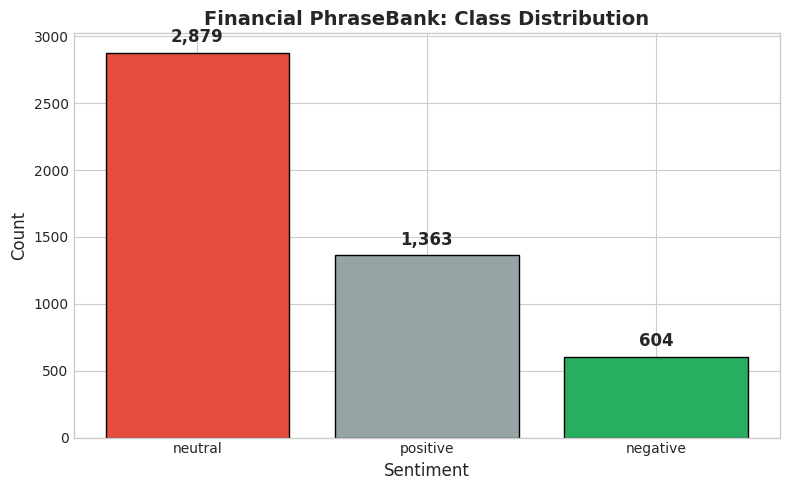

Saved: outputs/training/01_class_distribution.png


In [4]:
# Visualization 1: Class Distribution
fig, ax = plt.subplots(figsize=(8, 5))

class_counts = df["sentiment"].value_counts()
colors = ["#e74c3c", "#95a5a6", "#27ae60"]  # red, gray, green

bars = ax.bar(class_counts.index, class_counts.values, color=colors, edgecolor="black")

# Add count labels on bars
for bar, count in zip(bars, class_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
            f"{count:,}", ha="center", va="bottom", fontsize=12, fontweight="bold")

ax.set_xlabel("Sentiment", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Financial PhraseBank: Class Distribution", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.savefig("../outputs/training/01_class_distribution.png", dpi=150)
plt.show()

print("Saved: outputs/training/01_class_distribution.png")

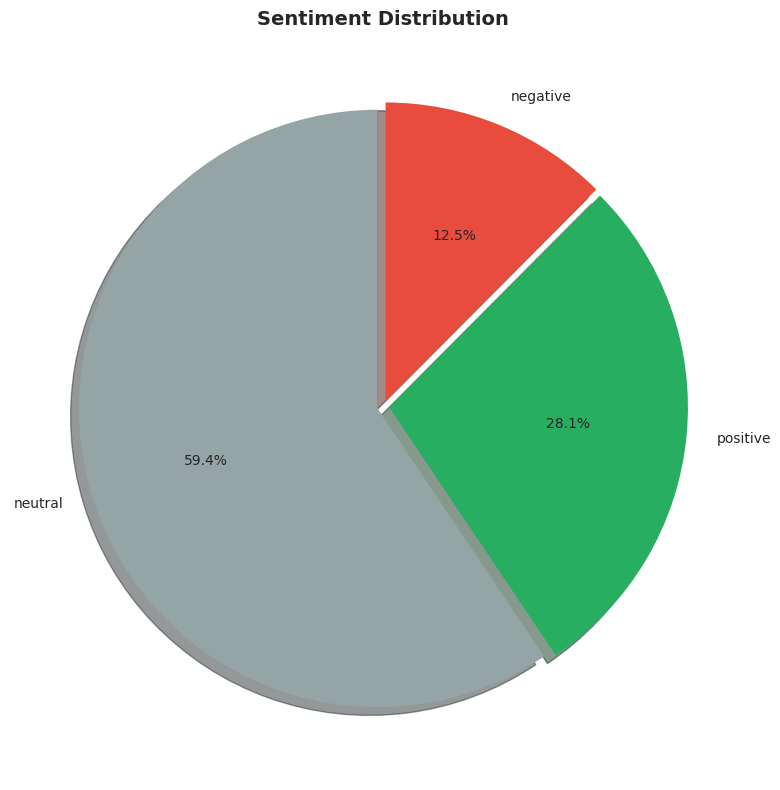

Saved: outputs/training/02_class_pie_chart.png


In [5]:
# Visualization 2: Class Distribution Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))

class_counts = df["sentiment"].value_counts()
colors = ["#95a5a6", "#27ae60", "#e74c3c"]  # Order: neutral, positive, negative

wedges, texts, autotexts = ax.pie(
    class_counts.values,
    labels=class_counts.index,
    autopct="%1.1f%%",
    colors=colors,
    explode=(0.02, 0.02, 0.02),
    shadow=True,
    startangle=90
)

ax.set_title("Sentiment Distribution", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.savefig("../outputs/training/02_class_pie_chart.png", dpi=150)
plt.show()

print("Saved: outputs/training/02_class_pie_chart.png")

In [6]:
# Text length statistics
print("=" * 50)
print("TEXT LENGTH STATISTICS")
print("=" * 50)

stats = get_text_statistics(df)
print(f"\nCharacter lengths:")
print(f"  Min:    {stats['char_min']:.0f}")
print(f"  Max:    {stats['char_max']:.0f}")
print(f"  Mean:   {stats['char_mean']:.1f}")
print(f"  Median: {stats['char_median']:.0f}")

print(f"\nWord counts:")
print(f"  Min:    {stats['word_min']:.0f}")
print(f"  Max:    {stats['word_max']:.0f}")
print(f"  Mean:   {stats['word_mean']:.1f}")
print(f"  Median: {stats['word_median']:.0f}")

TEXT LENGTH STATISTICS

Character lengths:
  Min:    9
  Max:    315
  Mean:   128.1
  Median: 119

Word counts:
  Min:    2
  Max:    81
  Mean:   23.1
  Median: 21


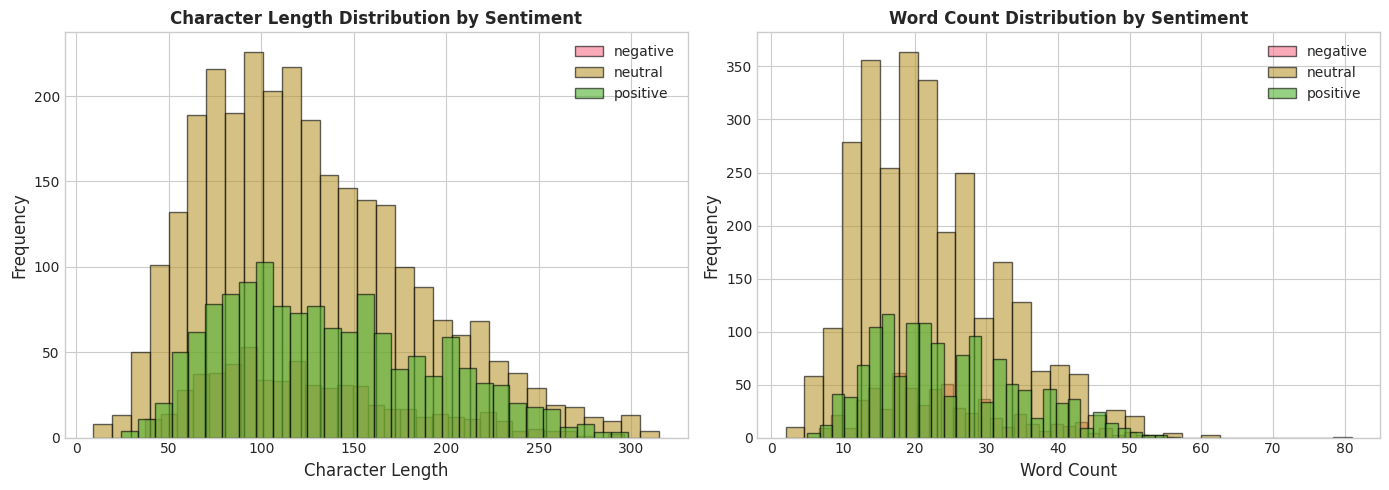

Saved: outputs/training/03_text_length_distribution.png


In [7]:
# Visualization 3: Text Length Distribution by Sentiment
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Character length distribution
for sentiment in ["negative", "neutral", "positive"]:
    subset = df[df["sentiment"] == sentiment]["text"].str.len()
    axes[0].hist(subset, bins=30, alpha=0.6, label=sentiment, edgecolor="black")

axes[0].set_xlabel("Character Length", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].set_title("Character Length Distribution by Sentiment", fontsize=12, fontweight="bold")
axes[0].legend()

# Word count distribution
for sentiment in ["negative", "neutral", "positive"]:
    subset = df[df["sentiment"] == sentiment]["text"].str.split().str.len()
    axes[1].hist(subset, bins=30, alpha=0.6, label=sentiment, edgecolor="black")

axes[1].set_xlabel("Word Count", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].set_title("Word Count Distribution by Sentiment", fontsize=12, fontweight="bold")
axes[1].legend()

plt.tight_layout()
plt.savefig("../outputs/training/03_text_length_distribution.png", dpi=150)
plt.show()

print("Saved: outputs/training/03_text_length_distribution.png")

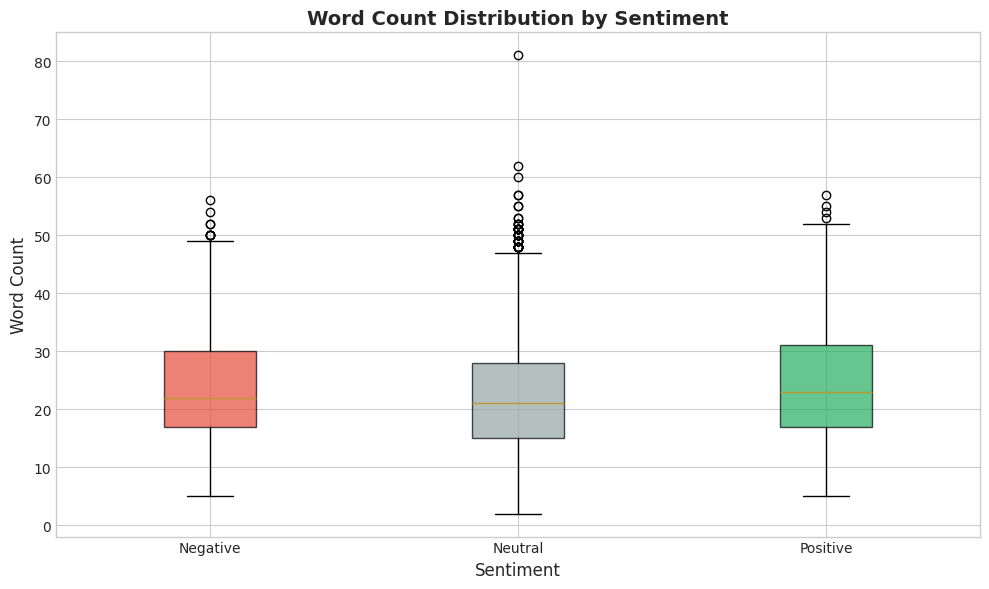

Saved: outputs/training/04_word_count_boxplot.png


In [9]:
# Visualization 4: Box plot of text lengths by sentiment
fig, ax = plt.subplots(figsize=(10, 6))

df["word_count"] = df["text"].str.split().str.len()

# Create box plot
box_data = [df[df["sentiment"] == s]["word_count"] for s in ["negative", "neutral", "positive"]]
bp = ax.boxplot(box_data, tick_labels=["Negative", "Neutral", "Positive"], patch_artist=True)

colors = ["#e74c3c", "#95a5a6", "#27ae60"]
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel("Sentiment", fontsize=12)
ax.set_ylabel("Word Count", fontsize=12)
ax.set_title("Word Count Distribution by Sentiment", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.savefig("../outputs/training/04_word_count_boxplot.png", dpi=150)
plt.show()

print("Saved: outputs/training/04_word_count_boxplot.png")

In [10]:
# Class weights for handling imbalance
print("=" * 50)
print("CLASS WEIGHTS (for weighted loss)")
print("=" * 50)

weights = get_class_weights(df)
for label, weight in sorted(weights.items()):
    sentiment = LABEL_NAMES[label]
    print(f"{sentiment:10s} (label={label}): {weight:.4f}")

print("\nNote: Higher weight = less frequent class = more importance in loss")

CLASS WEIGHTS (for weighted loss)
negative   (label=0): 2.6744
neutral    (label=1): 0.5611
positive   (label=2): 1.1851

Note: Higher weight = less frequent class = more importance in loss


In [11]:
# Create splits
train_df, val_df, test_df = create_splits(df)

print("=" * 50)
print("TRAIN/VALIDATION/TEST SPLIT")
print("=" * 50)
print(f"Train:      {len(train_df):,} samples ({len(train_df)/len(df)*100:.1f}%)")
print(f"Validation: {len(val_df):,} samples ({len(val_df)/len(df)*100:.1f}%)")
print(f"Test:       {len(test_df):,} samples ({len(test_df)/len(df)*100:.1f}%)")

# Verify stratification
print("\nClass distribution preserved in splits:")
for name, split_df in [("Train", train_df), ("Val", val_df), ("Test", test_df)]:
    dist = split_df["sentiment"].value_counts(normalize=True) * 100
    print(f"\n{name}:")
    for sentiment in ["negative", "neutral", "positive"]:
        print(f"  {sentiment}: {dist.get(sentiment, 0):.1f}%")

TRAIN/VALIDATION/TEST SPLIT
Train:      3,876 samples (80.0%)
Validation: 485 samples (10.0%)
Test:       485 samples (10.0%)

Class distribution preserved in splits:

Train:
  negative: 12.5%
  neutral: 59.4%
  positive: 28.1%

Val:
  negative: 12.4%
  neutral: 59.4%
  positive: 28.2%

Test:
  negative: 12.6%
  neutral: 59.4%
  positive: 28.0%


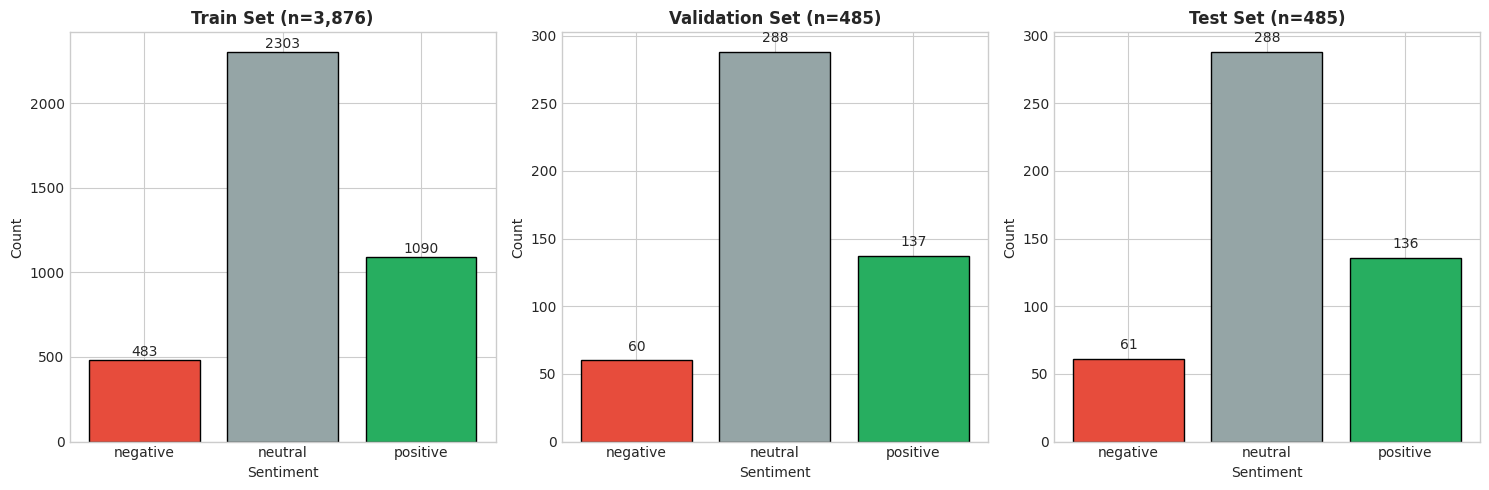

Saved: outputs/training/05_split_distribution.png


In [12]:
# Visualization 5: Class distribution across splits
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

splits = [("Train", train_df), ("Validation", val_df), ("Test", test_df)]
colors = ["#e74c3c", "#95a5a6", "#27ae60"]

for ax, (name, split_df) in zip(axes, splits):
    counts = split_df["sentiment"].value_counts()
    # Reorder to negative, neutral, positive
    counts = counts.reindex(["negative", "neutral", "positive"])
    
    bars = ax.bar(counts.index, counts.values, color=colors, edgecolor="black")
    
    for bar, count in zip(bars, counts.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                f"{count}", ha="center", va="bottom", fontsize=10)
    
    ax.set_title(f"{name} Set (n={len(split_df):,})", fontsize=12, fontweight="bold")
    ax.set_xlabel("Sentiment")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.savefig("../outputs/training/05_split_distribution.png", dpi=150)
plt.show()

print("Saved: outputs/training/05_split_distribution.png")

In [13]:
# Show sample sentences from each class
print("=" * 50)
print("SAMPLE SENTENCES BY SENTIMENT")
print("=" * 50)

for sentiment in ["positive", "neutral", "negative"]:
    print(f"\n{sentiment.upper()}:")
    samples = df[df["sentiment"] == sentiment]["text"].sample(3, random_state=42)
    for i, text in enumerate(samples, 1):
        print(f"  {i}. {text[:100]}...")

SAMPLE SENTENCES BY SENTIMENT

POSITIVE:
  1. The new agreement , which expands a long-established cooperation between the companies , involves th...
  2. ( ADP News ) - Finnish handling systems provider Cargotec Oyj ( HEL : CGCBV ) announced on Friday it...
  3. The world 's biggest magazine paper maker said the program to improve efficiency will include closin...

NEUTRAL:
  1. The center offers a comprehensive range of device design services spanning from electronics , mechan...
  2. AffectoGenimap builds highly customised IT solutions for its customers in Finland and the Baltic cou...
  3. The bank 's leasing arm Nordea Liising ended the year with a profit of 4.4 million euros ....

NEGATIVE:
  1. The company decided at the end of 2008 to temporarily shut down its ammonia plant in Billingham and ...
  2. down to EUR5 .9 m H1 '09 3 August 2009 - Finnish media group Ilkka-Yhtyma Oyj ( HEL : ILK2S ) said t...
  3. The steelmaker said that the drop in profit was explained by the contin

In [14]:
# Save processed splits for later use
train_df.to_csv("../data/processed/train.csv", index=False)
val_df.to_csv("../data/processed/val.csv", index=False)
test_df.to_csv("../data/processed/test.csv", index=False)

print("Saved processed splits:")
print("  - data/processed/train.csv")
print("  - data/processed/val.csv")
print("  - data/processed/test.csv")

Saved processed splits:
  - data/processed/train.csv
  - data/processed/val.csv
  - data/processed/test.csv


## Summary

### Dataset Statistics
- **Total samples:** ~4,845
- **Classes:** 3 (negative, neutral, positive)
- **Class imbalance:** Neutral is majority (~60%), negative is minority (~12%)

### Key Findings
1. **Class imbalance** - Need weighted loss or oversampling
2. **Text length** - Most sentences are 15-30 words, fits well in 128 token limit
3. **Stratified splits** - Class distribution preserved across train/val/test

### Next Steps
- Tokenization pipeline for all 4 models
- BERT baseline with frozen encoder